In [193]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score,LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import mean_squared_error,r2_score

In [194]:
df=pd.read_csv('C:\\Users\\AVIRAJ\\Downloads\\diamond_data.csv')
df.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,Good,F,61.1,61.0,682,4.29,4.32,2.63
1,0.72,Ideal,H,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,Premium,J,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,Premium,E,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,Ideal,D,62.7,56.0,1720,5.17,5.14,3.23


In [192]:
df['cut'].value_counts()/len(df['cut'])*100

Ideal        39.495798
Premium      25.145443
Very Good    23.141564
Good          9.566904
Fair          2.650291
Name: cut, dtype: float64

### Data Understanding 

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 9 columns):
carat    1547 non-null float64
cut      1547 non-null object
color    1547 non-null object
depth    1547 non-null float64
table    1547 non-null float64
price    1547 non-null int64
x        1547 non-null float64
y        1547 non-null float64
z        1547 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 108.9+ KB


In [195]:
Num=[]
Cat=[]
for i in df.columns:
    if df[i].dtype=='float64' or df[i].dtype=='int64':
        Num.append(i)
    else :
        Cat.append(i)

In [196]:
print("Numerical Features are :",Num)
print("Categorical features are :",Cat)

Numerical Features are : ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
Categorical features are : ['cut', 'color']


### Univariate Analysis

In [197]:
df.describe()

,carat,depth,table,price,x,y,z
count,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000
mean,0.791325,61.762185,57.445184,3938.685844,5.713594,5.714460,3.528203
std,0.475814,1.439904,2.235772,4117.039798,1.126730,1.116477,0.693149
min,0.230000,54.600000,52.000000,327.000000,3.860000,3.880000,2.310000
25%,0.400000,61.100000,56.000000,918.000000,4.705000,4.720000,2.910000
50%,0.700000,61.900000,57.000000,2301.000000,5.640000,5.660000,3.500000
75%,1.035000,62.500000,59.000000,5188.000000,6.535000,6.520000,4.030000
max,2.660000,71.800000,70.000000,18803.000000,9.080000,9.010000,5.540000


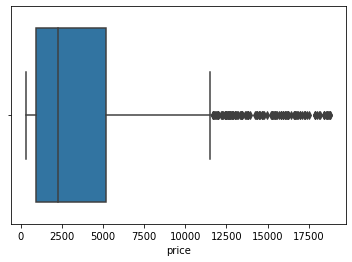

In [198]:
sns.boxplot(df['price'])
plt.show()

#### Certainly Outliers are present in our Target variable

###  Bivariate Analysis

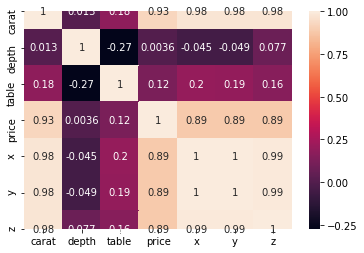

In [199]:
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Hence highest Correlated Features with Price are-x,y,z & carat

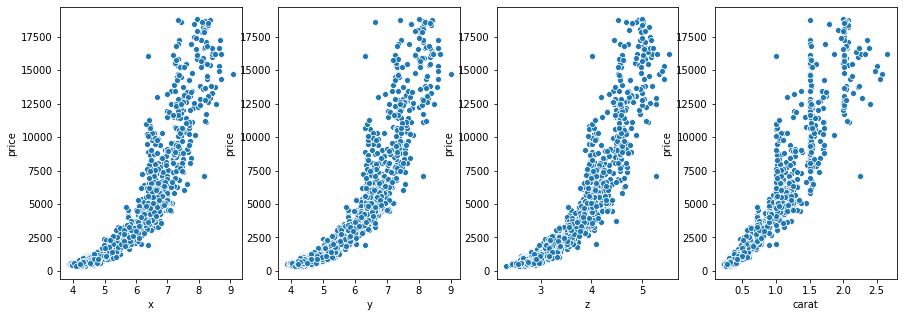

In [200]:
f,ax=plt.subplots(1,4,figsize=(15,5))
sns.scatterplot(x=df['x'],y=df['price'],ax=ax[0])
sns.scatterplot(x=df['y'],y=df['price'],ax=ax[1])
sns.scatterplot(x=df['z'],y=df['price'],ax=ax[2])
sns.scatterplot(x=df['carat'],y=df['price'],ax=ax[3])
plt.show()

#### Thus these features are highly linear features wrt Price

### Data Preprocessing

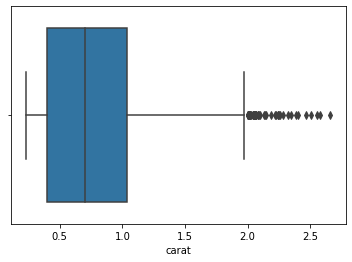

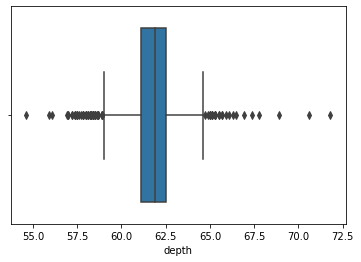

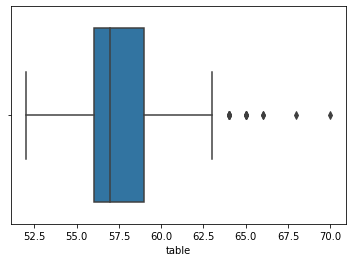

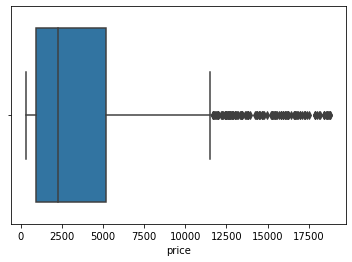

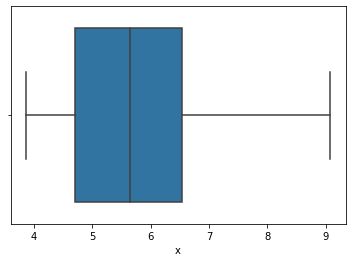

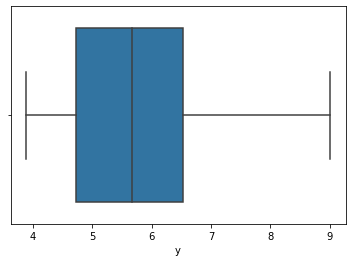

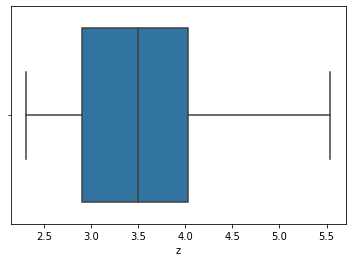

In [201]:
for i in Num:
    sns.boxplot(df[i])
    plt.show()

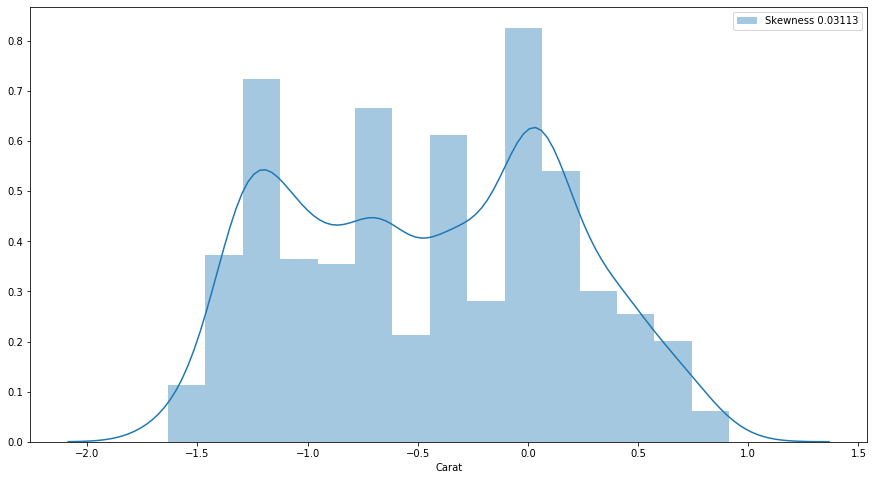

In [203]:
fd,fl=stats.boxcox(df.carat)
boxcox_skew=stats.skew(np.array(fd))
plt.figure(figsize=(15,8))
sns.distplot(fd,label='Skewness %.5f'%(boxcox_skew))
plt.legend()
plt.xlabel('Carat')
plt.show()

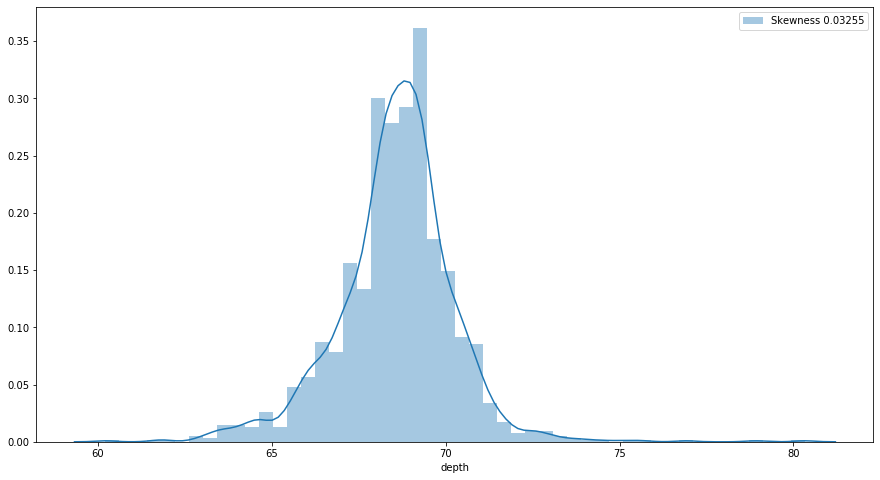

In [204]:
fd,fl=stats.boxcox(df.depth)
boxcox_skew=stats.skew(np.array(fd))
plt.figure(figsize=(15,8))
sns.distplot(fd,label='Skewness %.5f'%(boxcox_skew))
plt.legend()
plt.xlabel('depth')
plt.show()

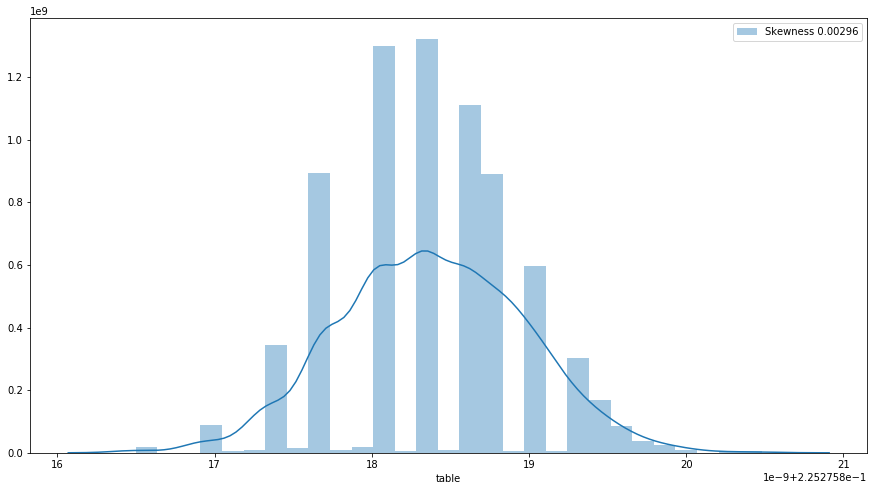

In [205]:
fd,fl=stats.boxcox(df.table)
boxcox_skew=stats.skew(np.array(fd))
plt.figure(figsize=(15,8))
sns.distplot(fd,label='Skewness %.5f'%(boxcox_skew))
plt.legend()
plt.xlabel('table')
plt.show()

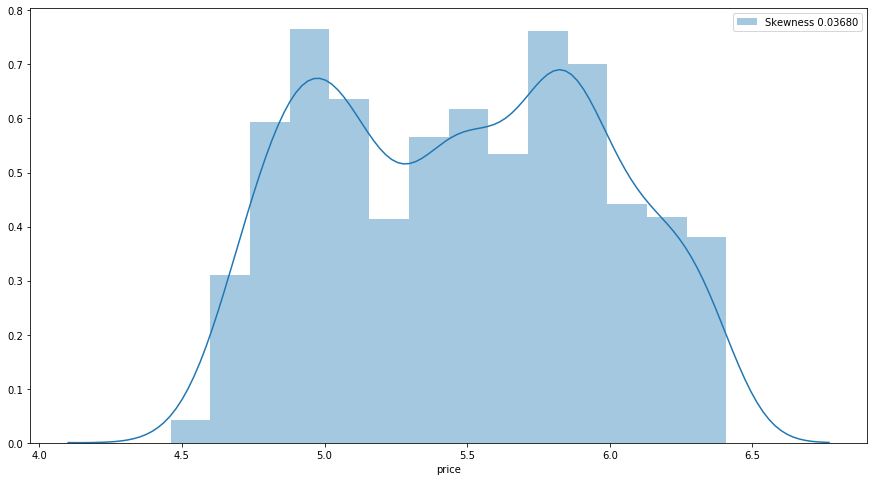

In [207]:
fd,fl=stats.boxcox(df.price)
boxcox_skew=stats.skew(np.array(fd))
plt.figure(figsize=(15,8))
sns.distplot(fd,label='Skewness %.5f'%(boxcox_skew))
plt.legend()
plt.xlabel('price')
plt.show()

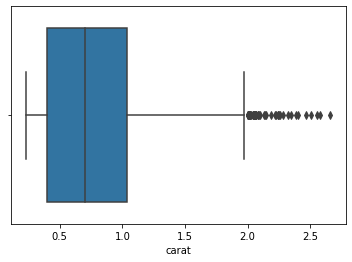

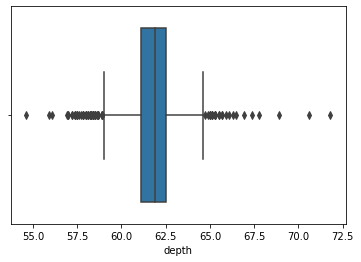

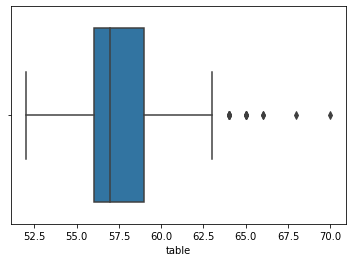

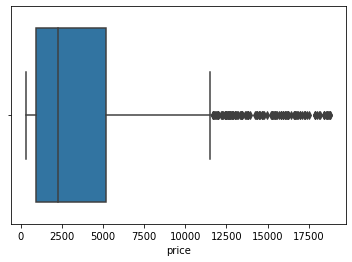

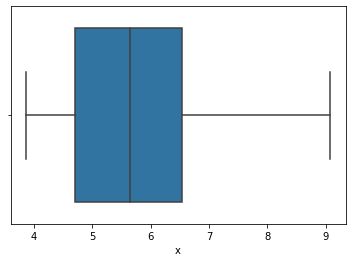

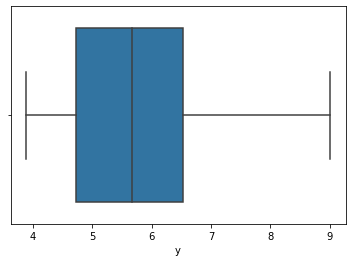

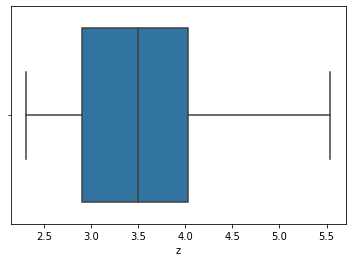

In [208]:
for i in Num:
    sns.boxplot(df[i])
    plt.show()

#### Hence Outlier treatment done here

In [209]:
df.isnull().sum()/len(df)*100

carat    0.0
cut      0.0
color    0.0
depth    0.0
table    0.0
price    0.0
x        0.0
y        0.0
z        0.0
dtype: float64

In [210]:
df.shape[0]

1547

In [211]:
for i in Num:
    df[i]=df[i].fillna(lambda x:np.median(x))

In [212]:
df.isnull().sum()/len(df)*100

carat    0.0
cut      0.0
color    0.0
depth    0.0
table    0.0
price    0.0
x        0.0
y        0.0
z        0.0
dtype: float64

### Hence Null value treatment done

In [213]:
df.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,Good,F,61.1,61.0,682,4.29,4.32,2.63
1,0.72,Ideal,H,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,Premium,J,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,Premium,E,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,Ideal,D,62.7,56.0,1720,5.17,5.14,3.23


In [214]:
df['cut'].value_counts()

Ideal        611
Premium      389
Very Good    358
Good         148
Fair          41
Name: cut, dtype: int64

In [215]:
df['color'].value_counts()

G    317
E    281
F    274
H    244
D    206
I    141
J     84
Name: color, dtype: int64

#### Perform Encoding of the Categorical variables

In [216]:
df=pd.get_dummies(data=df,columns=['cut','color'],drop_first=True)

In [217]:
df.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,61.1,61.0,682,4.29,4.32,2.63,1,0,0,0,0,1,0,0,0,0
1,0.72,62.0,56.0,2443,5.80,5.74,3.58,0,1,0,0,0,0,0,1,0,0
2,1.71,62.9,58.0,8848,7.64,7.58,4.79,0,0,1,0,0,0,0,0,0,1
3,1.01,59.2,59.0,7287,6.67,6.60,3.93,0,0,1,0,1,0,0,0,0,0
4,0.52,62.7,56.0,1720,5.17,5.14,3.23,0,1,0,0,0,0,0,0,0,0


### See if transform/Scaling needed

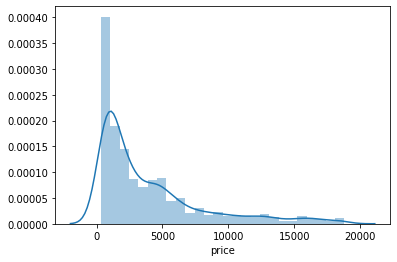

In [218]:
sns.distplot(df['price'])
plt.show()

In [219]:
df['price']=df['price'].apply(lambda x:np.log(x))

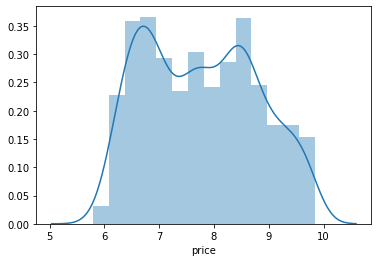

In [220]:
sns.distplot(df['price'])
plt.show()

### Transformed Successfully

In [221]:
df.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,61.1,61.0,6.525030,4.29,4.32,2.63,1,0,0,0,0,1,0,0,0,0
1,0.72,62.0,56.0,7.800982,5.80,5.74,3.58,0,1,0,0,0,0,0,1,0,0
2,1.71,62.9,58.0,9.087947,7.64,7.58,4.79,0,0,1,0,0,0,0,0,0,1
3,1.01,59.2,59.0,8.893847,6.67,6.60,3.93,0,0,1,0,1,0,0,0,0,0
4,0.52,62.7,56.0,7.450080,5.17,5.14,3.23,0,1,0,0,0,0,0,0,0,0


## Model Building 

In [222]:
x=df.drop(['price'],axis=1)
y=df['price']
Xc=sm.add_constant(x)
OLS_Model=sm.OLS(y,Xc).fit()
print(OLS_Model.summary())

C:\Users\AVIRAJ\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     2009.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:37:54   Log-Likelihood:                 154.37
No. Observations:                1547   AIC:                            -274.7
Df Residuals:                    1530   BIC:                            -183.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3885      1.360      1.021

### Assumptions

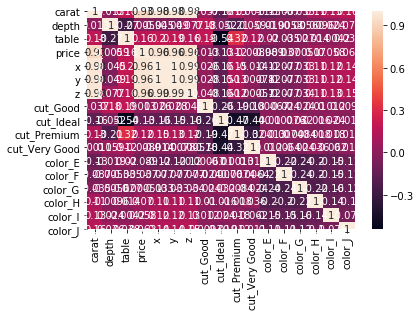

In [223]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [224]:
r1=OLS_Model.rsquared
r1

0.9545730183856728

In [225]:
vif_cutoff=1/(1-r1**2)
vif_cutoff

11.262484842718493

In [226]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(Xc.values,i) for i in range (Xc.shape[1])]
vf_df=pd.DataFrame({'VIF':vf},index=Xc.columns)
vf_df

,VIF
const,59012.084939
carat,26.246881
depth,30.219603
table,1.773069
x,862.720454
y,1142.317393
z,1866.962306
cut_Good,4.511303
cut_Ideal,12.481087
cut_Premium,8.916268


In [227]:
df.drop('x',axis=1,inplace=True)

In [228]:
x=df.drop(['price'],axis=1)
y=df['price']
Xc=sm.add_constant(x)
OLS_Model=sm.OLS(y,Xc).fit()
print(OLS_Model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     2136.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:38:29   Log-Likelihood:                 151.28
No. Observations:                1547   AIC:                            -270.6
Df Residuals:                    1531   BIC:                            -185.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.2971      1.122      2.938

In [229]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(Xc.values,i) for i in range (Xc.shape[1])]
vf_df=pd.DataFrame({'VIF':vf},index=Xc.columns)
vf_df

,VIF
const,40034.682406
carat,25.946137
depth,19.933155
table,1.767870
y,1137.377544
z,1159.355794
cut_Good,4.448593
cut_Ideal,12.320674
cut_Premium,8.906141
cut_Very Good,8.613856


In [230]:
df.drop(['table'],axis=1,inplace=True)

In [231]:
x=df.drop(['price'],axis=1)
y=df['price']
Xc=sm.add_constant(x)
OLS_Model=sm.OLS(y,Xc).fit()
print(OLS_Model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     2285.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:38:30   Log-Likelihood:                 149.71
No. Observations:                1547   AIC:                            -269.4
Df Residuals:                    1532   BIC:                            -189.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9356      1.063      3.703

In [232]:
df.drop(['y','cut_Good','color_E','color_F','color_G'],axis=1,inplace=True)

In [233]:
x=df.drop(['price'],axis=1)
y=df['price']
Xc=sm.add_constant(x)
OLS_Model=sm.OLS(y,Xc).fit()
print(OLS_Model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     3554.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:38:30   Log-Likelihood:                 147.32
No. Observations:                1547   AIC:                            -274.6
Df Residuals:                    1537   BIC:                            -221.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.2628      0.261     20.175

Now we have Good features

In [234]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(Xc.values,i) for i in range (Xc.shape[1])]
vf_df=pd.DataFrame({'VIF':vf},index=Xc.columns)
vf_df

,VIF
const,2161.002990
carat,25.877844
depth,1.237403
z,25.702951
cut_Ideal,2.774332
cut_Premium,2.544973
cut_Very Good,2.315339
color_H,1.060812
color_I,1.066211
color_J,1.074735


In [235]:
df.drop(['carat'],axis=1,inplace=True)

In [236]:
x=df.drop(['price'],axis=1)
y=df['price']
Xc=sm.add_constant(x)
OLS_Model=sm.OLS(y,Xc).fit()
print(OLS_Model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     3495.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:38:30   Log-Likelihood:                 47.712
No. Observations:                1547   AIC:                            -77.42
Df Residuals:                    1538   BIC:                            -29.33
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.4768      0.278     19.724

In [237]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(Xc.values,i) for i in range (Xc.shape[1])]
vf_df=pd.DataFrame({'VIF':vf},index=Xc.columns)
vf_df

,VIF
const,2154.119030
depth,1.127818
z,1.108338
cut_Ideal,2.772013
cut_Premium,2.544923
cut_Very Good,2.315297
color_H,1.058070
color_I,1.059304
color_J,1.059571


#### Now VIF is less.We can proceed 

In [238]:
residuals=OLS_Model.resid

#### A-1 Checking Normality of Residuals

In [239]:
stats.jarque_bera(residuals)


(222.06704098589282, 0.0)

Yes Residuals are normal !!!

### A-2 Homoscedasticity 

In [240]:
import statsmodels.stats.api as sms
test=sms.het_goldfeldquandt(residuals,x=Xc)
test

(0.9711349779826088, 0.6571763055845548, 'increasing')

Hence  Variance is constant!!!

## A-3 Autocorrelation

As DB test value>2,we have positive autocorrelation

### A-4  Linearity of model

In [241]:
sms.diagnostic.linear_rainbow(OLS_Model)

(1.1781294316270434, 0.01159423314523968)

Yes they are Linear in nature

## Model Evaluation

In [242]:
x=df.drop(['price'],axis=1)
y=df['price']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [243]:
lr=LinearRegression()
LR_model=lr.fit(X_train,y_train)

In [244]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("RMSE of Train=",np.sqrt(mean_squared_error(y_train,y_train_pred)))
print("RMSE of Test=",np.sqrt(mean_squared_error(y_test,y_test_pred)))

RMSE of Train= 0.2368793045032233
RMSE of Test= 0.22624829113965655


In [245]:
print(r2_score(y_train,y_train_pred))

0.9473713503220036


#### Checking RMSE & R2 on which Data? And what values tell?

In [246]:
print("Rsquared=",OLS_Model.rsquared)
print("Rsquared adj.=",OLS_Model.rsquared_adj)

Rsquared= 0.9478565553580673
Rsquared adj.= 0.9475853280777452


### They are quite close to each other

## Feature Selection

In [247]:
lr=LinearRegression()

folds=KFold(n_splits=5,shuffle=True,random_state=42)
sfs1=sfs(lr,k_features='best',cv=folds,scoring='r2')
sfs1.fit(X_train,y_train)

SequentialFeatureSelector(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                          estimator=LinearRegression(), k_features='best',
                          scoring='r2')

In [248]:
sfs1.k_feature_names_

('depth',
 'z',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_H',
 'color_I',
 'color_J')

In [249]:
sfs1.k_score_

0.9455661295925912

#### This was done by SFS method

In [250]:
lr=LinearRegression()
rfe=RFE(lr,n_features_to_select=6)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [251]:
rfe.n_features_

6

In [252]:
rfe.ranking_

array([3, 1, 1, 1, 2, 1, 1, 1])

In [253]:
pd.DataFrame(rfe.ranking_,columns=['ranks'],index=x.columns)

,ranks
depth,3
z,1
cut_Ideal,1
cut_Premium,1
cut_Very Good,2
color_H,1
color_I,1
color_J,1


Here Rank=1 are the best features we should take

### Model Reliability

In [254]:
x=df[['depth', 'z', 'cut_Ideal', 'color_H', 'color_I', 'color_J']]
y=df['price']
OLS_model2=sm.OLS(y,sm.add_constant(x)).fit()
print(OLS_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     4629.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:38:34   Log-Likelihood:                 41.878
No. Observations:                1547   AIC:                            -69.76
Df Residuals:                    1540   BIC:                            -32.35
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7775      0.260     22.263      0.0

C:\Users\AVIRAJ\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## OLS Model performs better

In [255]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [256]:
train_pred=lr.predict(X_train)
test_pred=lr.predict(X_test)
print("New RMSE train=",np.sqrt(mean_squared_error(y_train,train_pred)))
print("New RMSE test=",np.sqrt(mean_squared_error(y_test,test_pred)))

New RMSE train= 0.23811570912276406
New RMSE test= 0.22523956498087128


### We need to Regularization to reduce the error`

In [257]:
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV

In [258]:
ridge=Ridge(max_iter=1000)

In [259]:
rg=RidgeCV(cv=5,scoring='r2')
rg.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, scoring='r2')

In [260]:
rg.alpha_

1.0

In [261]:
rg.coef_


array([-0.05046619,  1.48989878,  0.06757978, -0.15541   , -0.29574961,
       -0.43186723])

In [262]:
rg.score

<bound method RegressorMixin.score of RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, scoring='r2')>

In [263]:
print("Best Rsquared value by Ridge model=",round(rg.best_score_,4)*100,"%")

Best Rsquared value by Ridge model= 94.56 %
